In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


EDA

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='str')

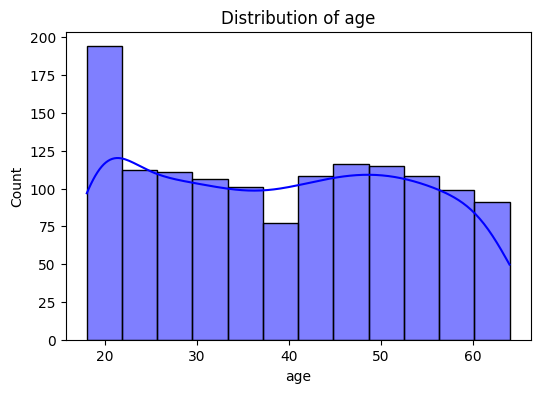

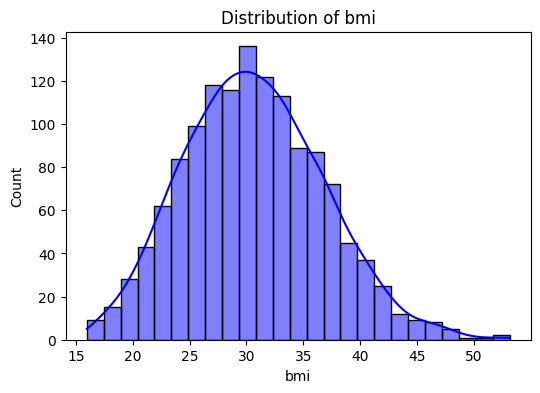

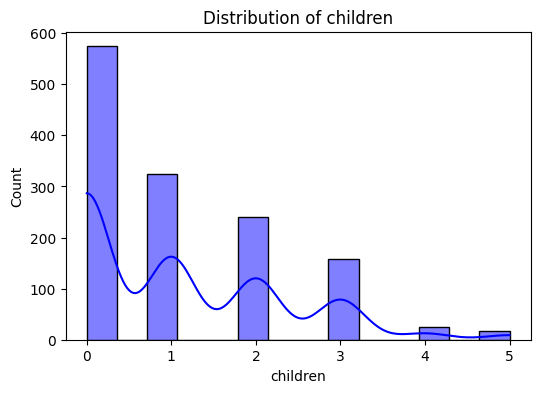

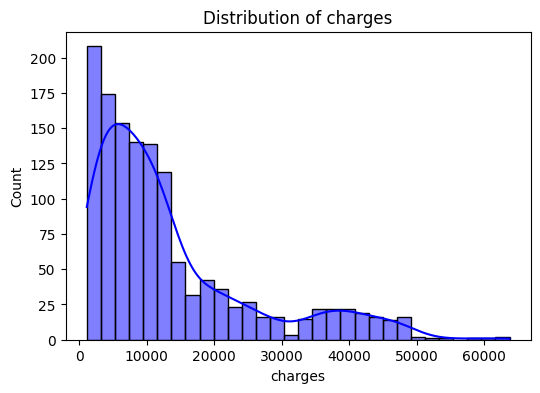

In [9]:
numeric_cols = ['age', 'bmi', 'children', 'charges']
for cols in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[cols], kde=True, color='blue')
    plt.title(f'Distribution of {cols}')
    plt.show()

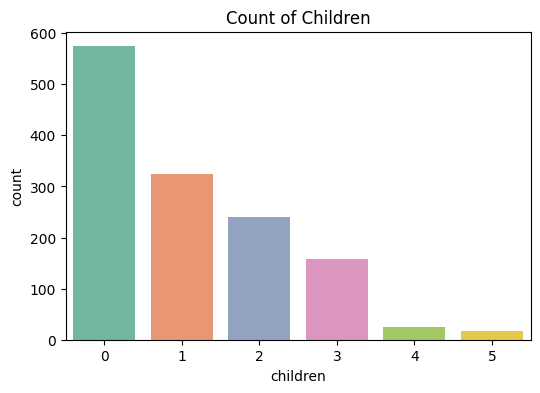

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='children', palette='Set2')
plt.title('Count of Children')
plt.show()

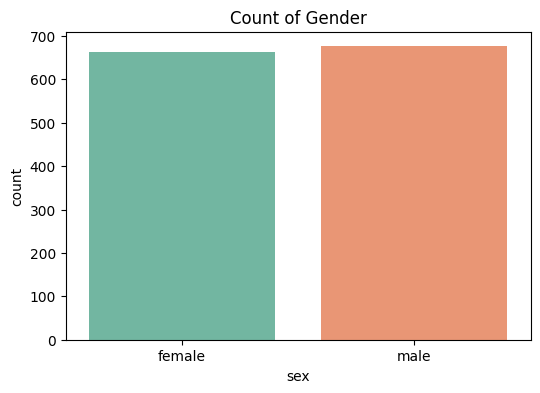

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sex', palette='Set2')
plt.title('Count of Gender')
plt.show()

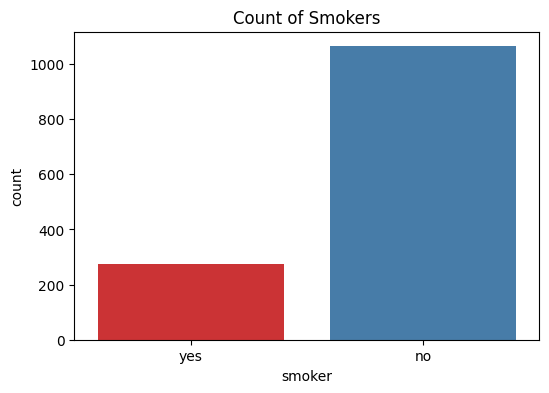

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='smoker', palette='Set1')
plt.title('Count of Smokers')
plt.show()

In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='str')

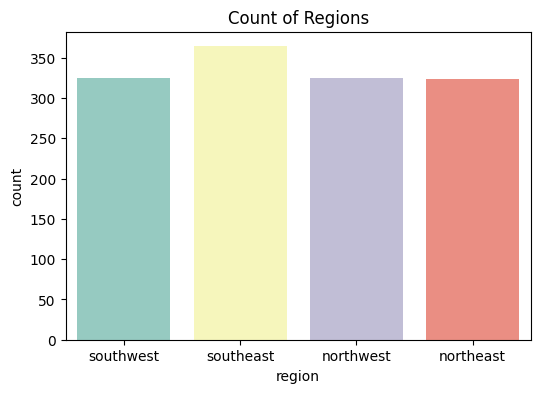

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['region'], palette='Set3')
plt.title('Count of Regions')
plt.show()

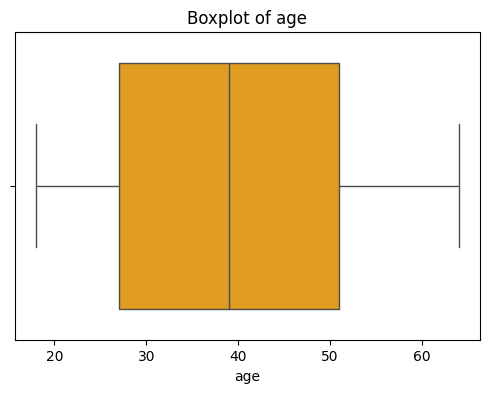

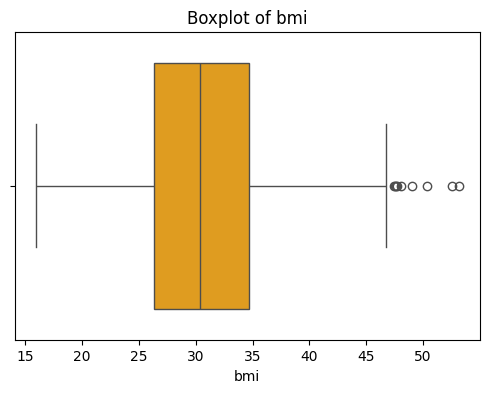

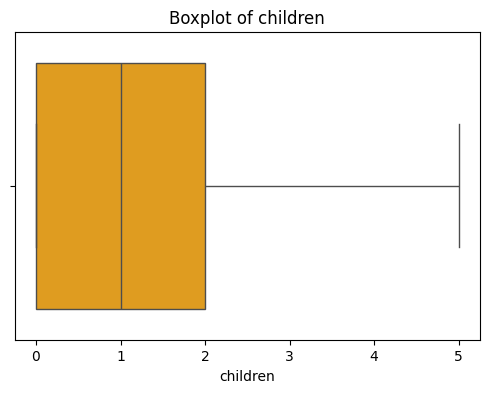

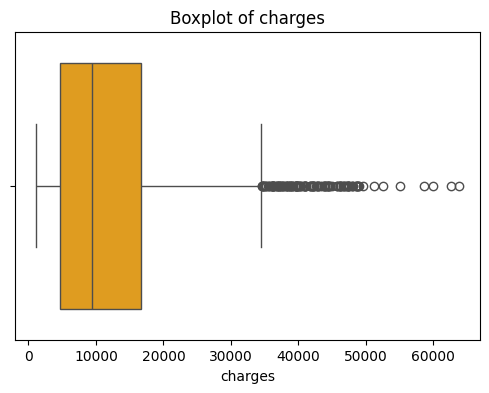

In [15]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.show()

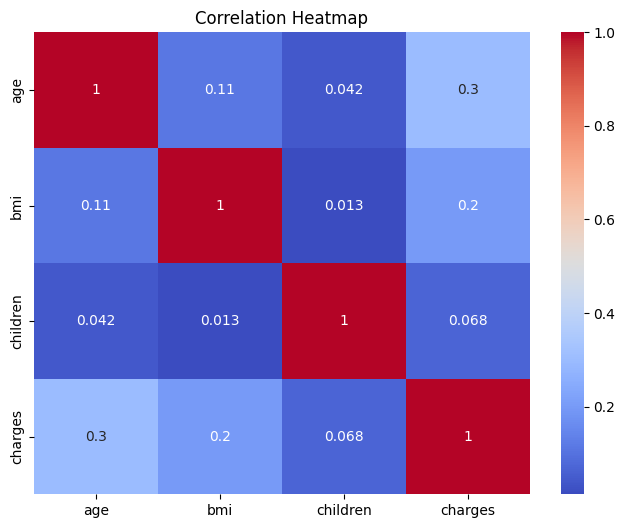

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Cleaning and preprocessing

In [17]:
df_cleaned = df.copy()
df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {df_cleaned.duplicated().sum()}")

Number of duplicate rows: 1


In [18]:
df_cleaned.drop_duplicates(inplace=True)

In [19]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [20]:
df_cleaned['sex'] = df_cleaned['sex'].map({'male': 0, 'female': 1})

In [21]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [22]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [23]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({'no': 0, 'yes': 1})

In [24]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [25]:
df_cleaned.rename(columns={'sex': 'is_female', 'smoker': 'is_smoker'}, inplace=True)

In [26]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [27]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [28]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['region'], drop_first=True)

In [29]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [30]:
df_cleaned = df_cleaned.astype('int')

In [31]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


# Feature Engineering and extraction

<Axes: xlabel='bmi', ylabel='Count'>

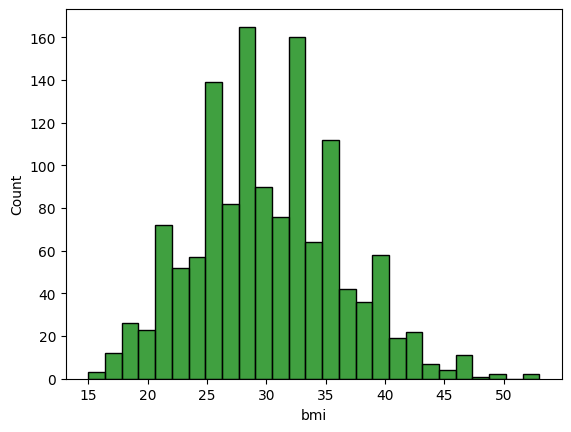

In [32]:
sns.histplot(df_cleaned['bmi'], color='green')

In [33]:
df_cleaned['bmi_category'] = pd.cut(df_cleaned['bmi'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=['Underweight', 'Normal weight', 'Overweight', 'Obese'])

In [34]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal weight
4,32,0,28,0,0,3866,1,0,0,Overweight


In [35]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['bmi_category'], drop_first=True)

In [36]:
df_cleaned = df_cleaned.astype('int')

In [37]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal weight,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


In [38]:
from sklearn.preprocessing import StandardScaler

cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [39]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal weight,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [40]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal weight', 'bmi_category_Overweight',
       'bmi_category_Obese'],
      dtype='str')

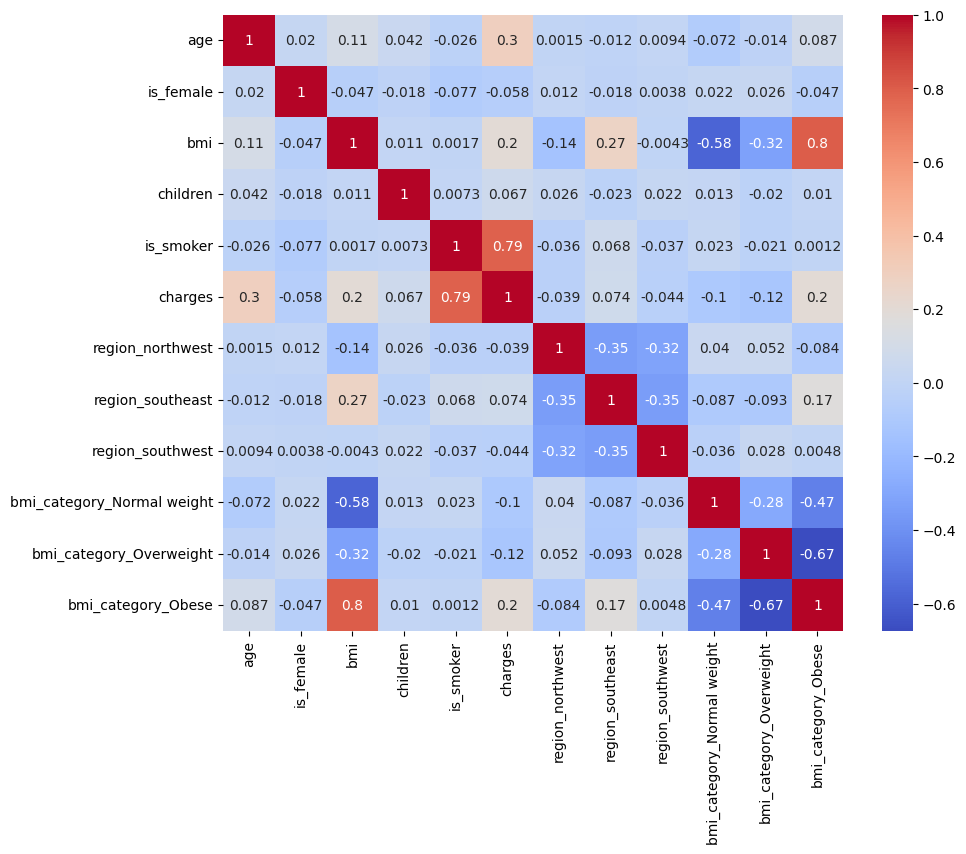

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.show()

In [42]:
from scipy.stats import pearsonr

selected_features = ['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal weight', 'bmi_category_Overweight',
       'bmi_category_Obese']

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}

correlations_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlations_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
5,charges,1.000000
4,is_smoker,0.787234
0,age,0.298309
11,bmi_category_Obese,0.200348
2,bmi,0.196236
7,region_southeast,0.073577
3,children,0.067390
6,region_northwest,-0.038695
8,region_southwest,-0.043637
1,is_female,-0.058046


In [43]:
cat_features = ['is_female', 'is_smoker', 'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal weight', 'bmi_category_Overweight', 'bmi_category_Obese']

In [44]:
from scipy.stats import chi2_contingency

alpha = 0.05

df_cleaned['charges_bin'] = pd.cut(
    df_cleaned['charges'],
    bins=4,
    labels=False
)

chi2_results = {}
for col in cat_features:
    contingency_table = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
    decision = 'Reject Null (keep feature)' if p_val < alpha else 'Fail to Reject Null (drop feature)'
    chi2_results[col] = {'chi2_statistic': chi2_stat, 'p_value': p_val, 'decision': decision}

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,decision
is_smoker,918.577819,0.0,Reject Null (keep feature)
bmi_category_Obese,170.68609,0.0,Reject Null (keep feature)
bmi_category_Overweight,83.354101,0.0,Reject Null (keep feature)
bmi_category_Normal weight,39.526341,0.0,Reject Null (keep feature)
region_southeast,13.502398,0.003667,Reject Null (keep feature)
is_female,11.212656,0.01063,Reject Null (keep feature)
region_southwest,6.611919,0.085352,Fail to Reject Null (drop feature)
region_northwest,5.61161,0.132113,Fail to Reject Null (drop feature)


In [45]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges', 'region_southeast', 'bmi_category_Obese']]

In [46]:
final_df.head()

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [48]:
X = final_df.drop('charges', axis=1)
y = final_df['charges']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [56]:
y_pred = model.predict(X_test)
y_pred[:5]

array([ 7856.41808069,  5379.07145062, 14613.47489419, 32465.93193508,
        8955.35729283])

In [57]:
y_test[:5]

900      8688
1064     5708
1256    11436
298     38746
237      4463
Name: charges, dtype: int64

In [58]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.8040712413347118